# Heart Attack Analysis & Prediction Dataset

### About the dataset

the Heart Attack Analysis & Prediction Dataset from kaggle https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

    -Age of the patient (age in years)
    -Sex of the patient (sex; 1 = male, 0 = female)
    -Exercise induced angina (exng; 1 = yes, 0 = no)
    -Number of major vessels (ca; 0-3)
    -Chest pain type (cp; Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    -Resting blood pressure (trestpbs; in mm/Hg on admission to the hospital)
    -Cholesterol levels (chol; in mg/dl)
    -Fasting blood sugar (fbs; if > 120 mg/dl, 1 = true; 0 = false)
    -Resting electrocardiographic results (rest_ecg; 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
    -Maximum heart rate achieved (thalach)
    -Chance of heart attack (target: Heart disease)
    -A blood disorder called thalassemia (thall; 1 = normal; 2 = fixed defect; 3 = reversable defect)
    -Previous peak (oldpeak; ST depression induced by exercise relative to rest - ‘ST’ relates to positions on the ECG plot)
    -Slope (slp; the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping)

### Main objective

The main objective of this excercise is to build and evalaute various Unsupervised models to
predict whether a particular person will have heart attack or not based on their features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\ebraa\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Engineering

In [5]:
duplicates=heart[heart.duplicated()]
duplicates

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
heart_attack = heart.drop_duplicates()
heart_attack['output'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

In [7]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp','caa', 'thall',  'output']

In [8]:
heart_attack[categorical] = heart_attack[categorical].astype('category')

In [9]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 18.2 KB


In [10]:
heart_attack.describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [11]:
np.sum(heart_attack.isna()==True)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Removing the outliers

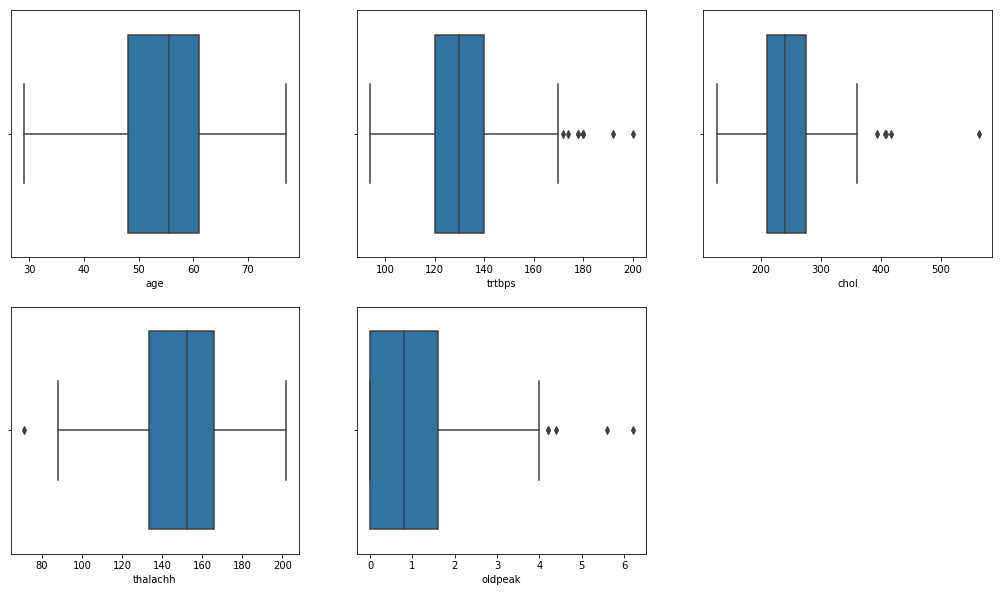

In [12]:
plt.figure(figsize=(30,10))
plt.subplot(2,5,1)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.boxplot(heart_attack['trtbps'])
plt.subplot(2,5,3)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,6)
sns.boxplot(heart_attack['thalachh'])
plt.subplot(2,5,7)
sns.boxplot(heart_attack['oldpeak']);

In [13]:
for col in ['trtbps', 'chol', 'oldpeak']:
    Q1 = heart_attack[col].quantile(0.25)
    Q3 = heart_attack[col].quantile(0.75)
    IQR = Q3 - Q1
    heart_attack.loc[heart_attack[col] > Q3 + 1.5 * IQR, col] = heart_attack.describe().loc['50%'][col]
    
Q1 = heart_attack['thalachh'].quantile(0.25)
Q3 = heart_attack['thalachh'].quantile(0.75)
IQR = Q3 - Q1
min_thalachh = Q1 - 1.5 * IQR
median_thalachh = heart_attack.describe().loc['50%']['thalachh']
heart_attack.loc[heart_attack['thalachh'] < min_thalachh, 'thalachh'] = median_thalachh

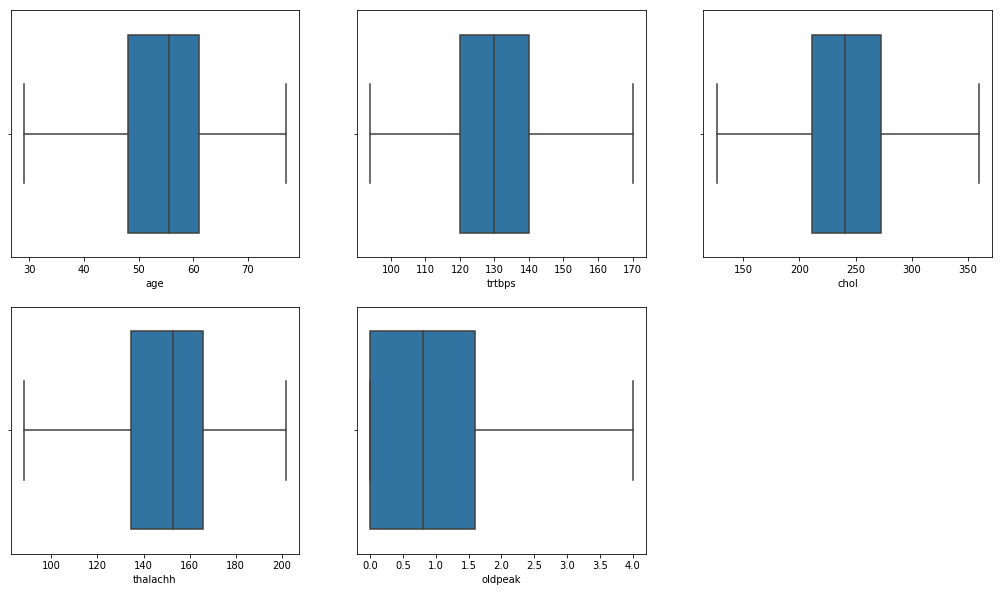

In [14]:
plt.figure(figsize=(30,10))
plt.subplot(2,5,1)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.boxplot(heart_attack['trtbps'])
plt.subplot(2,5,3)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,6)
sns.boxplot(heart_attack['thalachh'])
plt.subplot(2,5,7)
sns.boxplot(heart_attack['oldpeak']);

In [15]:
for col in heart_attack.columns:
    print(col,"-->",heart_attack[col].unique().size)

age --> 41
sex --> 2
cp --> 4
trtbps --> 43
chol --> 148
fbs --> 2
restecg --> 3
thalachh --> 91
exng --> 2
oldpeak --> 36
slp --> 3
caa --> 5
thall --> 4
output --> 2


In [16]:
numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
log_columns = heart_attack[numerical].skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

oldpeak    0.96995
dtype: float64

In [17]:
heart_attack[numerical] = np.log1p(heart_attack[numerical])

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for col in numerical:
    heart_attack[col] = sc.fit_transform(heart_attack[[col]])

heart_attack.head(4)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.926286,1,3,0.991864,-0.137887,1,0,0.082322,0,1.284737,0,0,1,1
1,-2.129845,1,2,0.053228,0.238038,0,1,1.470724,0,1.905745,0,0,2,1
2,-1.543100,0,1,0.053228,-0.847109,0,0,0.943963,0,0.647114,2,0,2,1
3,0.247216,1,1,-0.634296,-0.069602,0,1,1.159951,0,0.071103,2,0,2,1


### K-Means Clustering

In [19]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy

km_list = list()

for clust in range(1,13):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(heart_attack.drop('output', axis=1))
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

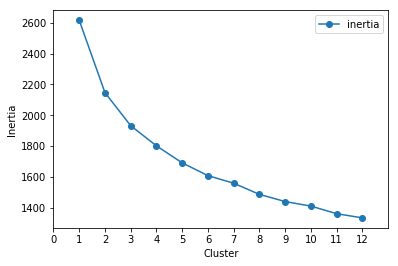

In [20]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,13))
ax.set_xlim(0,13)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [21]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(heart_attack.drop('output', axis=1))

heart_attack['kmeans'] = km.predict(heart_attack.drop('output', axis=1))
heart_attack[['output','kmeans']].groupby(['kmeans','output']).size().to_frame().rename(columns={0:'number'})

number
kmeans output        
0      0           43
       1          144
1      0           95
       1           20

### Agglomerative Clustering

In [22]:
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(heart_attack.drop('output', axis=1))
    heart_attack[str('agglom_'+linkage)] = ag.fit_predict(heart_attack.drop('output', axis=1))

In [23]:
heart_attack[['output','agglom_ward']].groupby(['output','agglom_ward']).size().to_frame().rename(columns={0:'number'})

number
output agglom_ward        
0      0                64
       1                74
1      0               155
       1                 9

In [24]:
heart_attack[['output','agglom_complete']].groupby(['output','agglom_complete']).size().to_frame().rename(columns={0:'number'})

number
output agglom_complete        
0      0                   126
       1                    12
1      0                   114
       1                    50

In [25]:
heart_attack[['output','agglom_complete', 'agglom_ward','kmeans']].groupby(['output', 'agglom_complete', 'agglom_ward', 'kmeans']).size().to_frame().rename(columns={0:'number'})

number
output agglom_complete agglom_ward kmeans        
0      0               0           0           34
                                   1           18
                       1           0            2
                                   1           72
       1               0           0            7
                                   1            5
                       1           0            0
                                   1            0
1      0               0           0           96
                                   1            9
                       1           0            0
                                   1            9
       1               0           0           48
                                   1            2
                       1           0            0
                                   1            0

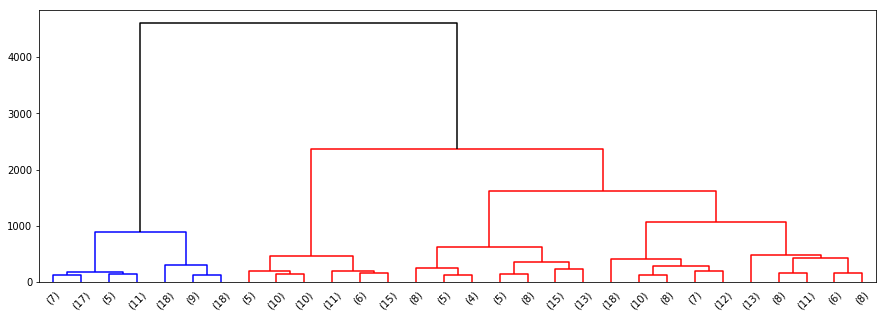

In [26]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))
hierarchy.set_link_color_palette(['blue', 'red'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='black')

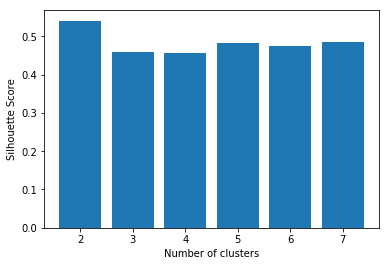

In [27]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(ag.children_, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(ag.children_))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Conclusion

From the analysis  performing both K-means and agglomerative clustering algorithms the best model for the prediction of a potential myocardial infarction is the Complete-link agglomerative technique. the most suitable is the Ward-link agglomerative clustering.

### Next steps
As a further suggestion, a DBSCAN could be implemented, following a Principal Component Analysis